In [1]:
!nvidia-smi

Mon Oct 14 16:38:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.7/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [8]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/content/dog.png' save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/dog.png: 640x384 1 person, 1 car, 1 dog, 62.9ms
Speed: 12.3ms preprocess, 62.9ms inference, 1093.6ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


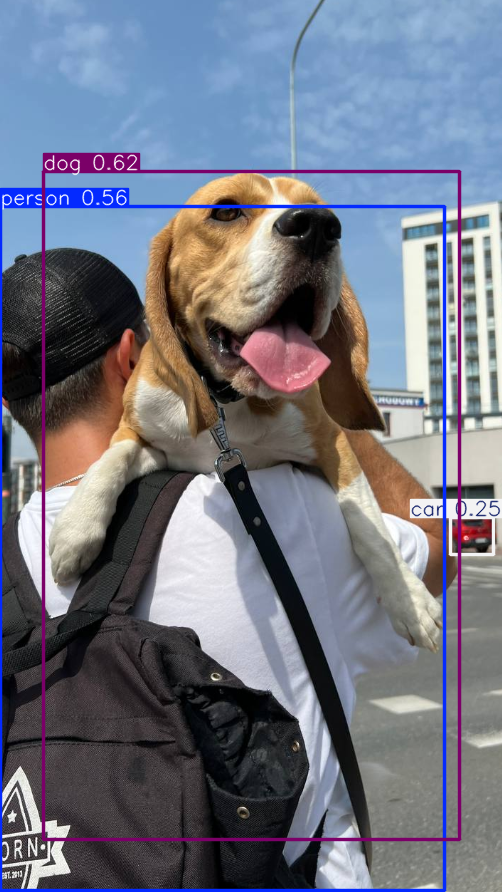

In [12]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.png', height=600)

In [10]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='/content/dog.png', conf=0.25)


image 1/1 /content/dog.png: 640x384 1 person, 1 car, 1 dog, 91.3ms
Speed: 3.4ms preprocess, 91.3ms inference, 665.2ms postprocess per image at shape (1, 3, 640, 384)


In [13]:
results[0].boxes.xyxy

tensor([[ 43.5908, 171.1370, 459.3218, 839.3552],
        [  0.0000, 206.1981, 444.5034, 890.3126],
        [450.9949, 517.9329, 493.6722, 554.6816]], device='cuda:0')

In [14]:
results[0].boxes.conf

tensor([0.6205, 0.5636, 0.2537], device='cuda:0')

In [15]:
results[0].boxes.cls

tensor([16.,  0.,  2.], device='cuda:0')